<a href="https://colab.research.google.com/github/HectorENevarez/YT-Title-Analysis/blob/main/youtube_title_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install langdetect

     |████████████████████████████████| 983kB 8.4MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=74791aee37345b37bc1a6164ace9039cfa497318e37a8a097cb1446a0118782c
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [16]:
# All packages used in notebook
import pandas as pd 
from langdetect import detect
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/HectorENevarez/YT-Title-Analysis/main/data/full_data.csv') #load data in df
df.head()

,Unnamed: 0,Channel,Subs,Title,Views,Link,Likes,Dislikes,Description
0,0,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | JAGER PRO™ TV Show | UPDATE...,"1,018 views",https://www.youtube.com/watch?v=Qw3k9jx-_2o,96,1,We are excited to share our passion with you t...
1,1,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | JAGER PRO™ TV Show | CAPTUR...,"5,481 views",https://www.youtube.com/watch?v=JcxbwQRa0qA,251,4,We are excited to share our passion with you t...
2,2,JAGER PRO™,79.6K subscribers,JAGER PRO™ 4G CAMERA 10-STEP SETUP,"1,393 views",https://www.youtube.com/watch?v=9zabPhfVxRs,53,3,"In this video, we go over all the steps needed..."
3,3,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | JAGER PRO™ TV Show | 100% C...,"6,688 views",https://www.youtube.com/watch?v=UVJNz5G68qQ,-1,-1,We are excited to share our passion with you t...
4,4,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | JAGER PRO™ TV Show | Perfor...,"10,992 views",https://www.youtube.com/watch?v=cVtNaJF2nJw,317,6,We are excited to share our passion with you t...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9033 entries, 0 to 9032
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   9033 non-null   int64 
 1   Channel      9033 non-null   object
 2   Subs         8973 non-null   object
 3   Title        9033 non-null   object
 4   Views        9033 non-null   object
 5   Link         9033 non-null   object
 6   Likes        9033 non-null   object
 7   Dislikes     9033 non-null   object
 8   Description  8898 non-null   object
dtypes: int64(1), object(8)
memory usage: 635.3+ KB


## Data Cleaning
In order to truly get a good representation of the type of language used in youtube titles, I wanted to have consistency with the data being used. For that reason I cleaned the data based on the following rules:
- Titles must be in english
- Remove channel name if in the title
- Only english characters we're kept
- Outliers (Viral Videos) were removed in order to capture a general creator's language

In [7]:
df.drop_duplicates(inplace=True, subset=['Title'])
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   8908 non-null   int64 
 1   Channel      8908 non-null   object
 2   Subs         8848 non-null   object
 3   Title        8908 non-null   object
 4   Views        8908 non-null   object
 5   Link         8908 non-null   object
 6   Likes        8908 non-null   object
 7   Dislikes     8908 non-null   object
 8   Description  8776 non-null   object
dtypes: int64(1), object(8)
memory usage: 626.5+ KB


In [8]:
#Dropping all videos with unreported view count
#[7] https://stackoverflow.com/questions/53775386/how-to-convert-number-mixed-with-character-to-integer-in-pandas

df['Views'] = df['Views'].str.replace('\D+','').astype(int)
df = df[df['Views'] != -1] #When collecting the data, if view count was unreported I had the script fill it with -1
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8908 entries, 0 to 8907
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   8908 non-null   int64 
 1   Channel      8908 non-null   object
 2   Subs         8848 non-null   object
 3   Title        8908 non-null   object
 4   Views        8908 non-null   int64 
 5   Link         8908 non-null   object
 6   Likes        8908 non-null   object
 7   Dislikes     8908 non-null   object
 8   Description  8776 non-null   object
dtypes: int64(2), object(7)
memory usage: 695.9+ KB


In [9]:
# Dropping all videos without english titles
def is_en(sent):
    try:
        if detect(sent) == 'en':
            return True
        else:
            return False
    except:
        return False

df['english'] = df['Title'].apply(is_en)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8908 entries, 0 to 8907
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   8908 non-null   int64 
 1   Channel      8908 non-null   object
 2   Subs         8848 non-null   object
 3   Title        8908 non-null   object
 4   Views        8908 non-null   int64 
 5   Link         8908 non-null   object
 6   Likes        8908 non-null   object
 7   Dislikes     8908 non-null   object
 8   Description  8776 non-null   object
 9   english      8908 non-null   bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 704.6+ KB


In [10]:
df['english'].value_counts()

True     6719
False    2189
Name: english, dtype: int64

In [11]:
df = df[df['english'] == True] #Keeping only english titles
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6719 entries, 0 to 8907
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   6719 non-null   int64 
 1   Channel      6719 non-null   object
 2   Subs         6667 non-null   object
 3   Title        6719 non-null   object
 4   Views        6719 non-null   int64 
 5   Link         6719 non-null   object
 6   Likes        6719 non-null   object
 7   Dislikes     6719 non-null   object
 8   Description  6618 non-null   object
 9   english      6719 non-null   bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 531.5+ KB


In [12]:
df_copy = df.copy()
df_copy.head()

,Unnamed: 0,Channel,Subs,Title,Views,Link,Likes,Dislikes,Description,english
0,0,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | JAGER PRO™ TV Show | UPDATE...,1018,https://www.youtube.com/watch?v=Qw3k9jx-_2o,96,1,We are excited to share our passion with you t...,True
1,1,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | JAGER PRO™ TV Show | CAPTUR...,5481,https://www.youtube.com/watch?v=JcxbwQRa0qA,251,4,We are excited to share our passion with you t...,True
3,3,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | JAGER PRO™ TV Show | 100% C...,6688,https://www.youtube.com/watch?v=UVJNz5G68qQ,-1,-1,We are excited to share our passion with you t...,True
4,4,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | JAGER PRO™ TV Show | Perfor...,10992,https://www.youtube.com/watch?v=cVtNaJF2nJw,317,6,We are excited to share our passion with you t...,True
5,5,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | JAGER PRO™ TV Show | How To...,6093,https://www.youtube.com/watch?v=Ig115mHuM_I,272,5,We are excited to share our passion with you t...,True


In [13]:
df = df_copy.copy() #backup

In [14]:
#Remove channel name if in title
def remove_chan(sent):
    return sent.replace(sent['Channel'], '')

df['Title'] = df.apply(lambda x: x['Title'].replace(x['Channel'], ''), axis=1)
df

,Unnamed: 0,Channel,Subs,Title,Views,Link,Likes,Dislikes,Description,english
0,0,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | TV Show | UPDATE: FLINT RI...,1018,https://www.youtube.com/watch?v=Qw3k9jx-_2o,96,1,We are excited to share our passion with you t...,True
1,1,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | TV Show | CAPTURE SUCCESS,5481,https://www.youtube.com/watch?v=JcxbwQRa0qA,251,4,We are excited to share our passion with you t...,True
3,3,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | TV Show | 100% CAPTURE SUC...,6688,https://www.youtube.com/watch?v=UVJNz5G68qQ,-1,-1,We are excited to share our passion with you t...,True
4,4,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | TV Show | Performance Base...,10992,https://www.youtube.com/watch?v=cVtNaJF2nJw,317,6,We are excited to share our passion with you t...,True
5,5,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | TV Show | How To Zero Puls...,6093,https://www.youtube.com/watch?v=Ig115mHuM_I,272,5,We are excited to share our passion with you t...,True
...,...,...,...,...,...,...,...,...,...,...
8903,4507,BadSeed Tech,260K subscribers,Glorious Panda Switch Review: Holy Cow they TH...,211029,https://www.youtube.com/watch?v=aUnm2DFTrzo,-1,-1,Checking out the new Glorious (Definitely NOT ...,True
8904,4508,BadSeed Tech,260K subscribers,Glorious Model D- Gaming Mouse Review: Does it...,61486,https://www.youtube.com/watch?v=k7mNLcOTHmk,-1,-1,Proud to be partnering with Dollar Shave Club ...,True
8905,4509,BadSeed Tech,260K subscribers,Logitech Color Collection & G733 Wireless Head...,39544,https://www.youtube.com/watch?v=xuzMXjtPa8s,-1,-1,Go to https://www.dashlane.com/badseed to get ...,True
8906,4510,BadSeed Tech,260K subscribers,Filco Majestouch Minila-R Convertible Review: ...,35123,https://www.youtube.com/watch?v=tO7ZYxjFTCU,-1,-1,For your chance to create your own dream PC se...,True


In [17]:
#Removing non english characters from the titles
#[8] https://www.analyticssteps.com/blogs/extracting-pre-processing-youtube-comments

def clean_title(sent):
    sent = word_tokenize(sent)
    return ' '.join([i for i in sent if i.isalpha()]).lower()

df['Title'] = df['Title'].apply(clean_title) #cleaining title data
df

,Unnamed: 0,Channel,Subs,Title,Views,Link,Likes,Dislikes,Description,english
0,0,JAGER PRO™,79.6K subscribers,wild hog control tv show update flint river pr...,1018,https://www.youtube.com/watch?v=Qw3k9jx-_2o,96,1,We are excited to share our passion with you t...,True
1,1,JAGER PRO™,79.6K subscribers,wild hog control tv show capture success,5481,https://www.youtube.com/watch?v=JcxbwQRa0qA,251,4,We are excited to share our passion with you t...,True
3,3,JAGER PRO™,79.6K subscribers,wild hog control tv show capture success,6688,https://www.youtube.com/watch?v=UVJNz5G68qQ,-1,-1,We are excited to share our passion with you t...,True
4,4,JAGER PRO™,79.6K subscribers,wild hog control tv show performance based dec...,10992,https://www.youtube.com/watch?v=cVtNaJF2nJw,317,6,We are excited to share our passion with you t...,True
5,5,JAGER PRO™,79.6K subscribers,wild hog control tv show how to zero pulsar op...,6093,https://www.youtube.com/watch?v=Ig115mHuM_I,272,5,We are excited to share our passion with you t...,True
...,...,...,...,...,...,...,...,...,...,...
8903,4507,BadSeed Tech,260K subscribers,glorious panda switch review holy cow they thocc,211029,https://www.youtube.com/watch?v=aUnm2DFTrzo,-1,-1,Checking out the new Glorious (Definitely NOT ...,True
8904,4508,BadSeed Tech,260K subscribers,glorious model gaming mouse review does it mea...,61486,https://www.youtube.com/watch?v=k7mNLcOTHmk,-1,-1,Proud to be partnering with Dollar Shave Club ...,True
8905,4509,BadSeed Tech,260K subscribers,logitech color collection wireless headset rev...,39544,https://www.youtube.com/watch?v=xuzMXjtPa8s,-1,-1,Go to https://www.dashlane.com/badseed to get ...,True
8906,4510,BadSeed Tech,260K subscribers,filco majestouch convertible review weird wire...,35123,https://www.youtube.com/watch?v=tO7ZYxjFTCU,-1,-1,For your chance to create your own dream PC se...,True


In [18]:
#Reset index after cleaning data
df.reset_index(drop=True ,inplace=True)
df

,Unnamed: 0,Channel,Subs,Title,Views,Link,Likes,Dislikes,Description,english
0,0,JAGER PRO™,79.6K subscribers,wild hog control tv show update flint river pr...,1018,https://www.youtube.com/watch?v=Qw3k9jx-_2o,96,1,We are excited to share our passion with you t...,True
1,1,JAGER PRO™,79.6K subscribers,wild hog control tv show capture success,5481,https://www.youtube.com/watch?v=JcxbwQRa0qA,251,4,We are excited to share our passion with you t...,True
2,3,JAGER PRO™,79.6K subscribers,wild hog control tv show capture success,6688,https://www.youtube.com/watch?v=UVJNz5G68qQ,-1,-1,We are excited to share our passion with you t...,True
3,4,JAGER PRO™,79.6K subscribers,wild hog control tv show performance based dec...,10992,https://www.youtube.com/watch?v=cVtNaJF2nJw,317,6,We are excited to share our passion with you t...,True
4,5,JAGER PRO™,79.6K subscribers,wild hog control tv show how to zero pulsar op...,6093,https://www.youtube.com/watch?v=Ig115mHuM_I,272,5,We are excited to share our passion with you t...,True
...,...,...,...,...,...,...,...,...,...,...
6714,4507,BadSeed Tech,260K subscribers,glorious panda switch review holy cow they thocc,211029,https://www.youtube.com/watch?v=aUnm2DFTrzo,-1,-1,Checking out the new Glorious (Definitely NOT ...,True
6715,4508,BadSeed Tech,260K subscribers,glorious model gaming mouse review does it mea...,61486,https://www.youtube.com/watch?v=k7mNLcOTHmk,-1,-1,Proud to be partnering with Dollar Shave Club ...,True
6716,4509,BadSeed Tech,260K subscribers,logitech color collection wireless headset rev...,39544,https://www.youtube.com/watch?v=xuzMXjtPa8s,-1,-1,Go to https://www.dashlane.com/badseed to get ...,True
6717,4510,BadSeed Tech,260K subscribers,filco majestouch convertible review weird wire...,35123,https://www.youtube.com/watch?v=tO7ZYxjFTCU,-1,-1,For your chance to create your own dream PC se...,True


In [19]:
df['Views'].describe()

count    6.719000e+03
mean     1.853138e+05
std      1.123594e+06
min      1.000000e+00
25%      2.017500e+03
50%      9.222000e+03
75%      4.157500e+04
max      2.764250e+07
Name: Views, dtype: float64

In [20]:
'''
Removing the outliers
To remove the outliers I calculated the low fence(q1 - 1.5(IQR)) and high fence(q3+1.5(IQR))
'''

q1 = df['Views'].quantile(0.25)
q3 = df['Views'].quantile(.75)
IQR = q3 - q1

fence_low = q1-(1.5*IQR)
fence_high = q3+(1.5*IQR)
print(fence_low, fence_high)

-57318.75 100911.25


In [21]:
df = df[df['Views'] < fence_high] #dropping outliers
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5738 entries, 0 to 5737
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   5738 non-null   int64 
 1   Channel      5738 non-null   object
 2   Subs         5686 non-null   object
 3   Title        5738 non-null   object
 4   Views        5738 non-null   int64 
 5   Link         5738 non-null   object
 6   Likes        5738 non-null   object
 7   Dislikes     5738 non-null   object
 8   Description  5649 non-null   object
 9   english      5738 non-null   bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 409.2+ KB


In [22]:
df['Views'].describe()

count      5738.000000
mean      15523.019345
std       21580.185410
min           1.000000
25%        1592.000000
50%        6131.000000
75%       19038.500000
max      100900.000000
Name: Views, dtype: float64

In [23]:
# Cleaning Subs data
def conversion(value):
    if 'M' in value:
        return int(float(value[:-1]) * 1000000)
    elif 'K' in value:
        return int(float(value[:-1]) * 1000)
    else:
        return value
df = df.dropna(subset=['Subs'])
df['Subs'] = df['Subs'].apply(lambda x: str(x).split(' ')[0])
df['Subs'] = df['Subs'].apply(conversion)
df.head()

,Unnamed: 0,Channel,Subs,Title,Views,Link,Likes,Dislikes,Description,english
0,0,JAGER PRO™,79600,wild hog control tv show update flint river pr...,1018,https://www.youtube.com/watch?v=Qw3k9jx-_2o,96,1,We are excited to share our passion with you t...,True
1,1,JAGER PRO™,79600,wild hog control tv show capture success,5481,https://www.youtube.com/watch?v=JcxbwQRa0qA,251,4,We are excited to share our passion with you t...,True
2,3,JAGER PRO™,79600,wild hog control tv show capture success,6688,https://www.youtube.com/watch?v=UVJNz5G68qQ,-1,-1,We are excited to share our passion with you t...,True
3,4,JAGER PRO™,79600,wild hog control tv show performance based dec...,10992,https://www.youtube.com/watch?v=cVtNaJF2nJw,317,6,We are excited to share our passion with you t...,True
4,5,JAGER PRO™,79600,wild hog control tv show how to zero pulsar op...,6093,https://www.youtube.com/watch?v=Ig115mHuM_I,272,5,We are excited to share our passion with you t...,True


In [24]:
df

,Unnamed: 0,Channel,Subs,Title,Views,Link,Likes,Dislikes,Description,english
0,0,JAGER PRO™,79600,wild hog control tv show update flint river pr...,1018,https://www.youtube.com/watch?v=Qw3k9jx-_2o,96,1,We are excited to share our passion with you t...,True
1,1,JAGER PRO™,79600,wild hog control tv show capture success,5481,https://www.youtube.com/watch?v=JcxbwQRa0qA,251,4,We are excited to share our passion with you t...,True
2,3,JAGER PRO™,79600,wild hog control tv show capture success,6688,https://www.youtube.com/watch?v=UVJNz5G68qQ,-1,-1,We are excited to share our passion with you t...,True
3,4,JAGER PRO™,79600,wild hog control tv show performance based dec...,10992,https://www.youtube.com/watch?v=cVtNaJF2nJw,317,6,We are excited to share our passion with you t...,True
4,5,JAGER PRO™,79600,wild hog control tv show how to zero pulsar op...,6093,https://www.youtube.com/watch?v=Ig115mHuM_I,272,5,We are excited to share our passion with you t...,True
...,...,...,...,...,...,...,...,...,...,...
5733,4506,BadSeed Tech,260000,hati s gaming mouse review pricy but promising,49424,https://www.youtube.com/watch?v=kUSZscFAfrw,-1,-1,Review of the PRE-RELEASE sample for the G-Wol...,True
5734,4508,BadSeed Tech,260000,glorious model gaming mouse review does it mea...,61486,https://www.youtube.com/watch?v=k7mNLcOTHmk,-1,-1,Proud to be partnering with Dollar Shave Club ...,True
5735,4509,BadSeed Tech,260000,logitech color collection wireless headset rev...,39544,https://www.youtube.com/watch?v=xuzMXjtPa8s,-1,-1,Go to https://www.dashlane.com/badseed to get ...,True
5736,4510,BadSeed Tech,260000,filco majestouch convertible review weird wire...,35123,https://www.youtube.com/watch?v=tO7ZYxjFTCU,-1,-1,For your chance to create your own dream PC se...,True


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5686 entries, 0 to 5737
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   5686 non-null   int64 
 1   Channel      5686 non-null   object
 2   Subs         5686 non-null   int64 
 3   Title        5686 non-null   object
 4   Views        5686 non-null   int64 
 5   Link         5686 non-null   object
 6   Likes        5686 non-null   object
 7   Dislikes     5686 non-null   object
 8   Description  5597 non-null   object
 9   english      5686 non-null   bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 449.8+ KB


In [26]:
df['Subs'].astype(int) #converting from pandas object to int
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5686 entries, 0 to 5737
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   5686 non-null   int64 
 1   Channel      5686 non-null   object
 2   Subs         5686 non-null   int64 
 3   Title        5686 non-null   object
 4   Views        5686 non-null   int64 
 5   Link         5686 non-null   object
 6   Likes        5686 non-null   object
 7   Dislikes     5686 non-null   object
 8   Description  5597 non-null   object
 9   english      5686 non-null   bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 449.8+ KB


In [27]:
df['Subs'].describe()

count    5.686000e+03
mean     2.268797e+05
std      3.999063e+05
min      1.490000e+04
25%      4.570000e+04
50%      1.005000e+05
75%      2.400000e+05
max      4.030000e+06
Name: Subs, dtype: float64

# Analyzing the data
Now that the data is cleaned, we can begin to analyze the data. The goal of this analysis is to see what kind of langauge is used by different sized youtube channels and how well this translates over to views. Our data was seperated by subscriber counts into 4 groups. The type of analysis we will be doing is:
- Looking at most frequent bigrams
- Looking at title length
- Looking at title readability score

In [29]:
!pip install textstat

     |████████████████████████████████| 102kB 5.3MB/s 
     |████████████████████████████████| 1.9MB 10.6MB/s 


In [30]:
from heapq import nlargest 
import nltk
from itertools import chain
from nltk.text import Text
import matplotlib
import textstat

In [32]:
#getting bigrams of all titles

df_titles = df['Title'].apply(lambda row: nltk.word_tokenize(row)).tolist()
title_tokens = list(chain.from_iterable(df_titles))
title_tokens = [w.lower() for w in title_tokens if w.isalnum()]

bigrams = nltk.FreqDist(nltk.ngrams(title_tokens, 2))
bigrams.most_common(5)

[(('how', 'to'), 419),
 (('haas', 'automation'), 96),
 (('of', 'the'), 82),
 (('samsung', 'galaxy'), 61),
 (('to', 'make'), 60)]

In [33]:
#Getting highest viewed bigram on average

sent = "" 
avg_view_per_bi = {}
for bi, freq in bigrams.most_common(1000):
    sent = bi[0] + " " + bi[1]
    total_app = df[df['Title'].str.contains(sent)]
    avg_views = total_app['Views'].sum() / freq
    avg_view_per_bi[sent] = avg_views
print(avg_view_per_bi)

{'how to': 12549.381861575179, 'haas automation': 19920.927083333332, 'of the': 20994.829268292684, 'samsung galaxy': 12864.180327868853, 'to make': 16309.6, 'to buy': 11881.636363636364, 'in the': 18370.094339622643, 'wild hog': 13886.6, 'free fire': 3134.183673469388, 'hog trapping': 16724.770833333332, 'q a': 29447.145833333332, 'top best': 8787.489361702128, 'automation service': 10852.644444444444, 'first look': 19954.325581395347, 'the best': 22941.071428571428, 'in hindi': 3668.6, 'iphone pro': 23712.55, 'youtube channel': 17224.28205128205, 'in india': 33033.62162162162, 'buy in': 3823.8333333333335, 'on the': 26381.085714285713, 'tv show': 8893.764705882353, 'what is': 10159.454545454546, 'in top': 84.3030303030303, 'to get': 13722.709677419354, 'tonight i': 22657.064516129034, 'the day': 31094.464285714286, 'the new': 19222.296296296296, 'on your': 8904.37037037037, 'with a': 54484.851851851854, 'on youtube': 26921.11111111111, 'for the': 17480.14814814815, 'by techylover': 4

In [34]:
#seperating top 15 bigrams by average views for plotting

largest_15_keys = nlargest(15, avg_view_per_bi, key=avg_view_per_bi.get)
largest_15_values = []
for val in largest_15_keys:
    largest_15_values.append(avg_view_per_bi[val])
print(largest_15_values)
print(largest_15_keys)

[259775.44444444444, 146199.66666666666, 144008.42857142858, 99544.5, 99281.35, 83666.14285714286, 82836.0, 82257.2, 81311.25, 81053.29411764706, 78568.8, 76433.25, 74967.5, 73828.25, 73686.75]
['as a', 'to a', 'review a', 'x vs', 'on a', 'rs in', 'and a', 'in a', 'buy a', 'for a', 'how i', 'in an', 'one to', 'gadgets review', 'part i']


<Figure size 432x288 with 0 Axes>

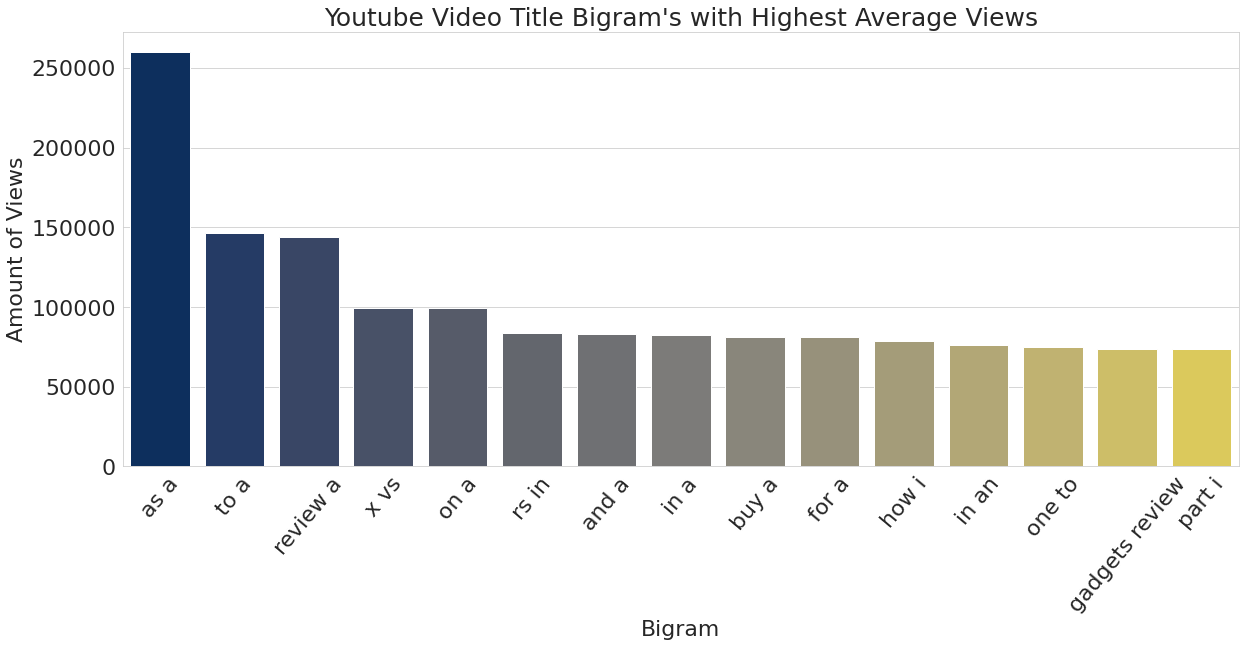

In [35]:
#PLotting bigrams
sns.set_style("whitegrid")

sns.despine()
plt.figure(figsize=(20, 8))
ax = sns.barplot(x=largest_15_keys, y=largest_15_values, palette='cividis')

plt.yticks(fontsize=22)
ax.set_xticklabels(rotation=50, labels=largest_15_keys, fontsize=22)

plt.ylabel("Amount of Views", fontsize=22)
plt.xlabel("Bigram", fontsize=22)
plt.title("Youtube Video Title Bigram's with Highest Average Views", fontsize=25)
plt.show()

In [36]:
#turning titles into long string

df_titles = df['Title'].apply(lambda row: nltk.word_tokenize(row)).tolist()
title_tokens = list(chain.from_iterable(df_titles))

title_tokens = ([w.lower() for w in title_tokens if w.isalnum()])

In [37]:
# analyzing concordance
# [9] https://stackoverflow.com/questions/29110950/python-concordance-command-in-nltk

text = Text(title_tokens)
text.concordance('gadgets')

Displaying 9 of 9 matches:
martphone shiftwear preview amazing gadgets from the future hoverboard youtuber
 gaming accessories for pubg mobile gadgets review realme cheapest gaming phone
 realme cheapest gaming phone under gadgets review realme pro india s first sma
realme pro india s first smartphone gadgets review samsung galaxy super quad ca
ro after one month pubg mobile dknm gadgets review oneplus vs asus rog phone wh
heater urdu hindi top home security gadgets urdu hindi smallrig dslr accessorie
rsion problem solution best amazing gadgets on bulbul app must have unique cool
on bulbul app must have unique cool gadgets how to record screen on windows pc 
u can buy macbook air all the suits gadgets in miles morales ray tracing compar


In [38]:
'''
In this step we are providing the same analysis as in the steps before except seperating by channel size

Small channel = df_25
Medium channel = df_50
Large channel = df_75
'''

#splitting into equal groups based on channel size
df_25 = df[df['Subs'] < df['Subs'].quantile(0.33)]
df_50 = df[(df['Subs'] >= df['Subs'].quantile(0.33)) & (df['Subs'] <= df['Subs'].quantile(.66))]
df_75 = df[df['Subs'] > df['Subs'].quantile(0.66)]

print(len(df_25), len(df_50), len(df_75))

1872 1918 1896


In [39]:
df_titles_25 = df_25['Title'].apply(lambda row: nltk.word_tokenize(row)).tolist()
title_tokens_25 = list(chain.from_iterable(df_titles_25))
title_tokens_25 = [w.lower() for w in title_tokens_25 if w.isalnum()]

df_titles_50 = df_50['Title'].apply(lambda row: nltk.word_tokenize(row)).tolist()
title_tokens_50 = list(chain.from_iterable(df_titles_50))
title_tokens_50 = [w.lower() for w in title_tokens_50 if w.isalnum()]

df_titles_75 = df_75['Title'].apply(lambda row: nltk.word_tokenize(row)).tolist()
title_tokens_75 = list(chain.from_iterable(df_titles_75))
title_tokens_75 = [w.lower() for w in title_tokens_75 if w.isalnum()]

In [40]:
bigrams_25 = nltk.FreqDist(nltk.ngrams(title_tokens_25, 2))
bigrams_25.most_common(5)

[(('how', 'to'), 110),
 (('to', 'buy'), 34),
 (('top', 'best'), 29),
 (('buy', 'in'), 29),
 (('in', 'top'), 27)]

In [41]:
bigrams_50 = nltk.FreqDist(nltk.ngrams(title_tokens_50, 2))
bigrams_50.most_common(5)

[(('how', 'to'), 112),
 (('wild', 'hog'), 50),
 (('hog', 'trapping'), 48),
 (('tv', 'show'), 34),
 (('tonight', 'i'), 31)]

In [42]:
bigrams_75 = nltk.FreqDist(nltk.ngrams(title_tokens_75, 2))
bigrams_75.most_common(5)

[(('how', 'to'), 197),
 (('haas', 'automation'), 96),
 (('automation', 'service'), 45),
 (('of', 'the'), 44),
 (('free', 'fire'), 44)]

In [43]:
sent = ""
avg_view_per_bi_25 = {}
for bi, freq in bigrams_25.most_common(1000):
    sent = bi[0] + " " + bi[1]
    total_app = df_25[df_25['Title'].str.contains(sent)]
    avg_views = total_app['Views'].sum() / freq
    avg_view_per_bi_25[sent] = avg_views
print(avg_view_per_bi_25)


{'how to': 14476.854545454546, 'to buy': 3555.264705882353, 'top best': 1900.3793103448277, 'buy in': 210.51724137931035, 'in top': 0.0, 'by techylover': 4212.153846153846, 'dld sync': 2156.090909090909, 'mining rig': 22520.904761904763, 'in hindi': 3415.0476190476193, 'hindi by': 3415.0476190476193, 'to mine': 17784.736842105263, 'in the': 12335.166666666666, 'ham radio': 7884.055555555556, 'first look': 19950.0, 'jim heath': 7015.235294117647, 'q a': 2796.375, 'of the': 5727.8125, 'gpu mining': 21306.1875, 'samsung galaxy': 1116.25, 'factory reset': 1634.4375, 'newman motor': 478.26666666666665, 'google account': 46235.933333333334, 'hard reset': 1686.2857142857142, 'reset factory': 1686.2857142857142, 'the best': 13132.461538461539, 'with arduino': 34403.07692307692, 'getting started': 27041.53846153846, 'build a': 30506.76923076923, 'design build': 17316.846153846152, 'and review': 13512.0, 'the world': 19039.0, 'arduino ide': 47204.25, 'azure sql': 398.5833333333333, 'master piece

In [44]:
largest_15_keys_25 = nlargest(15, avg_view_per_bi_25, key=avg_view_per_bi_25.get)
largest_15_values_25 = []
for val in largest_15_keys_25:
    largest_15_values_25.append(avg_view_per_bi_25[val])
print(largest_15_values_25)
print(largest_15_keys_25)

[92691.75, 92654.0, 89072.5, 87482.0, 87266.0, 81929.0, 79726.0, 78688.5, 72779.0, 70117.5, 68711.0, 67231.66666666667, 66299.5, 65124.333333333336, 63055.5]
['with a', 'mining eth', 'r for', 'in a', 'on a', 'build an', 'rgb review', 'fidget spinner', 'fan review', 'cards for', 'remove pattern', 'challenge replay', 'ide getting', 'mavic mini', 'the mining']


In [45]:
sent = ""
avg_view_per_bi_50 = {}
for bi, freq in bigrams_50.most_common(1000):
    sent = bi[0] + " " + bi[1]
    total_app = df_50[df_50['Title'].str.contains(sent)]
    avg_views = total_app['Views'].sum() / freq
    avg_view_per_bi_50[sent] = avg_views
print(avg_view_per_bi_50)

{'how to': 7593.732142857143, 'wild hog': 13886.6, 'hog trapping': 16724.770833333332, 'tv show': 8893.764705882353, 'tonight i': 22657.064516129034, 'to make': 14828.967741935483, 'q a': 45619.724137931036, 'samsung galaxy': 8626.035714285714, 'show preview': 7017.84, 'preview episode': 7017.84, 'i ll': 24006.045454545456, 'll be': 24006.045454545456, 'of the': 7057.409090909091, 'in india': 20968.380952380954, 'pubg mobile': 11592.5, 'tv episode': 600.6315789473684, 'maintenance minute': 1144.888888888889, 'be eating': 31176.647058823528, 'in the': 11712.764705882353, 'on the': 11564.8125, 'urdu hindi': 2431.5, 'unboxing review': 2892.733333333333, 'episode wild': 0.0, 'promo wild': 0.0, 'the best': 12991.42857142857, 'top best': 13307.5, 'guru bhai': 5228.785714285715, 'hog control': 13949.384615384615, 'episode promo': 700.8461538461538, 'hog hunting': 36195.75, 'iphone pro': 8248.833333333334, 'is the': 8434.25, 'what is': 4707.333333333333, 'to the': 9859.666666666666, 'xbox seri

In [46]:
largest_15_keys_50 = nlargest(15, avg_view_per_bi_50, key=avg_view_per_bi_50.get)
largest_15_values_50 = []
for val in largest_15_keys_50:
    largest_15_values_50.append(avg_view_per_bi_50[val])
print(largest_15_values_50)
print(largest_15_keys_50)

[104842.5, 88825.0, 88018.0, 87313.5, 85135.0, 83993.5, 82198.66666666667, 79259.33333333333, 76120.0, 75340.33333333333, 71036.0, 70683.66666666667, 68373.33333333333, 66898.5, 66182.77777777778]
['in a', 'a v', 'speaker review', 'all the', 'and fly', 'india working', 'coding a', 'to a', 'voxel game', 'video editing', 'with video', 'john smith', 'trapping capture', 'get a', 'on a']


In [47]:
sent = ""
avg_view_per_bi_75 = {}
for bi, freq in bigrams_75.most_common(1000):
    sent = bi[0] + " " + bi[1]
    total_app = df_75[df_75['Title'].str.contains(sent)]
    avg_views = total_app['Views'].sum() / freq
    avg_view_per_bi_75[sent] = avg_views
print(avg_view_per_bi_75)

{'how to': 14290.553299492385, 'haas automation': 19920.927083333332, 'automation service': 10852.644444444444, 'of the': 33515.181818181816, 'free fire': 3205.5227272727275, 'youtube channel': 17098.35135135135, 'on youtube': 27923.80769230769, 'the day': 33294.5, 'tip of': 34077.36, 'apps minute': 8878.041666666666, 'to make': 19718.739130434784, 'deep learning': 17888.217391304348, 'iphone pro': 37095.681818181816, 'technical boss': 19361.47619047619, 'first look': 25587.3, 'new event': 964.75, 'new update': 6635.421052631579, 'late upload': 17002.315789473683, 'youtube video': 32494.38888888889, 'in the': 30692.5, 'to get': 19064.0, 'samsung galaxy': 30901.529411764706, 'the haas': 22918.058823529413, 'automation tip': 45381.294117647056, 'automation inc': 26236.41176470588, 'dc motor': 22288.176470588234, 'by technical': 16153.70588235294, 'crushing crunchy': 18987.9375, 'crunchy soft': 18987.9375, 'soft things': 18987.9375, 'things by': 18987.9375, 'by car': 18987.9375, 'in nepal

In [48]:
largest_15_keys_75 = nlargest(15, avg_view_per_bi_75, key=avg_view_per_bi_75.get)
largest_15_values_75 = []
for val in largest_15_keys_75:
    largest_15_values_75.append(avg_view_per_bi_75[val])
print(largest_15_values_75)
print(largest_15_keys_75)

[762030.3333333334, 312715.0, 238117.0, 209802.25, 195978.0, 173277.2, 145509.66666666666, 126155.0, 116238.5, 92203.5, 91122.5, 87001.66666666667, 85806.33333333333, 83507.5, 81520.0]
['as a', 's first', 'on and', 'review a', 'to a', 'on a', 'for a', 'rs in', 'phone vs', 'a to', 'bluetooth speakers', 'of a', 'india june', 'the lost', 'experiment aluminum']


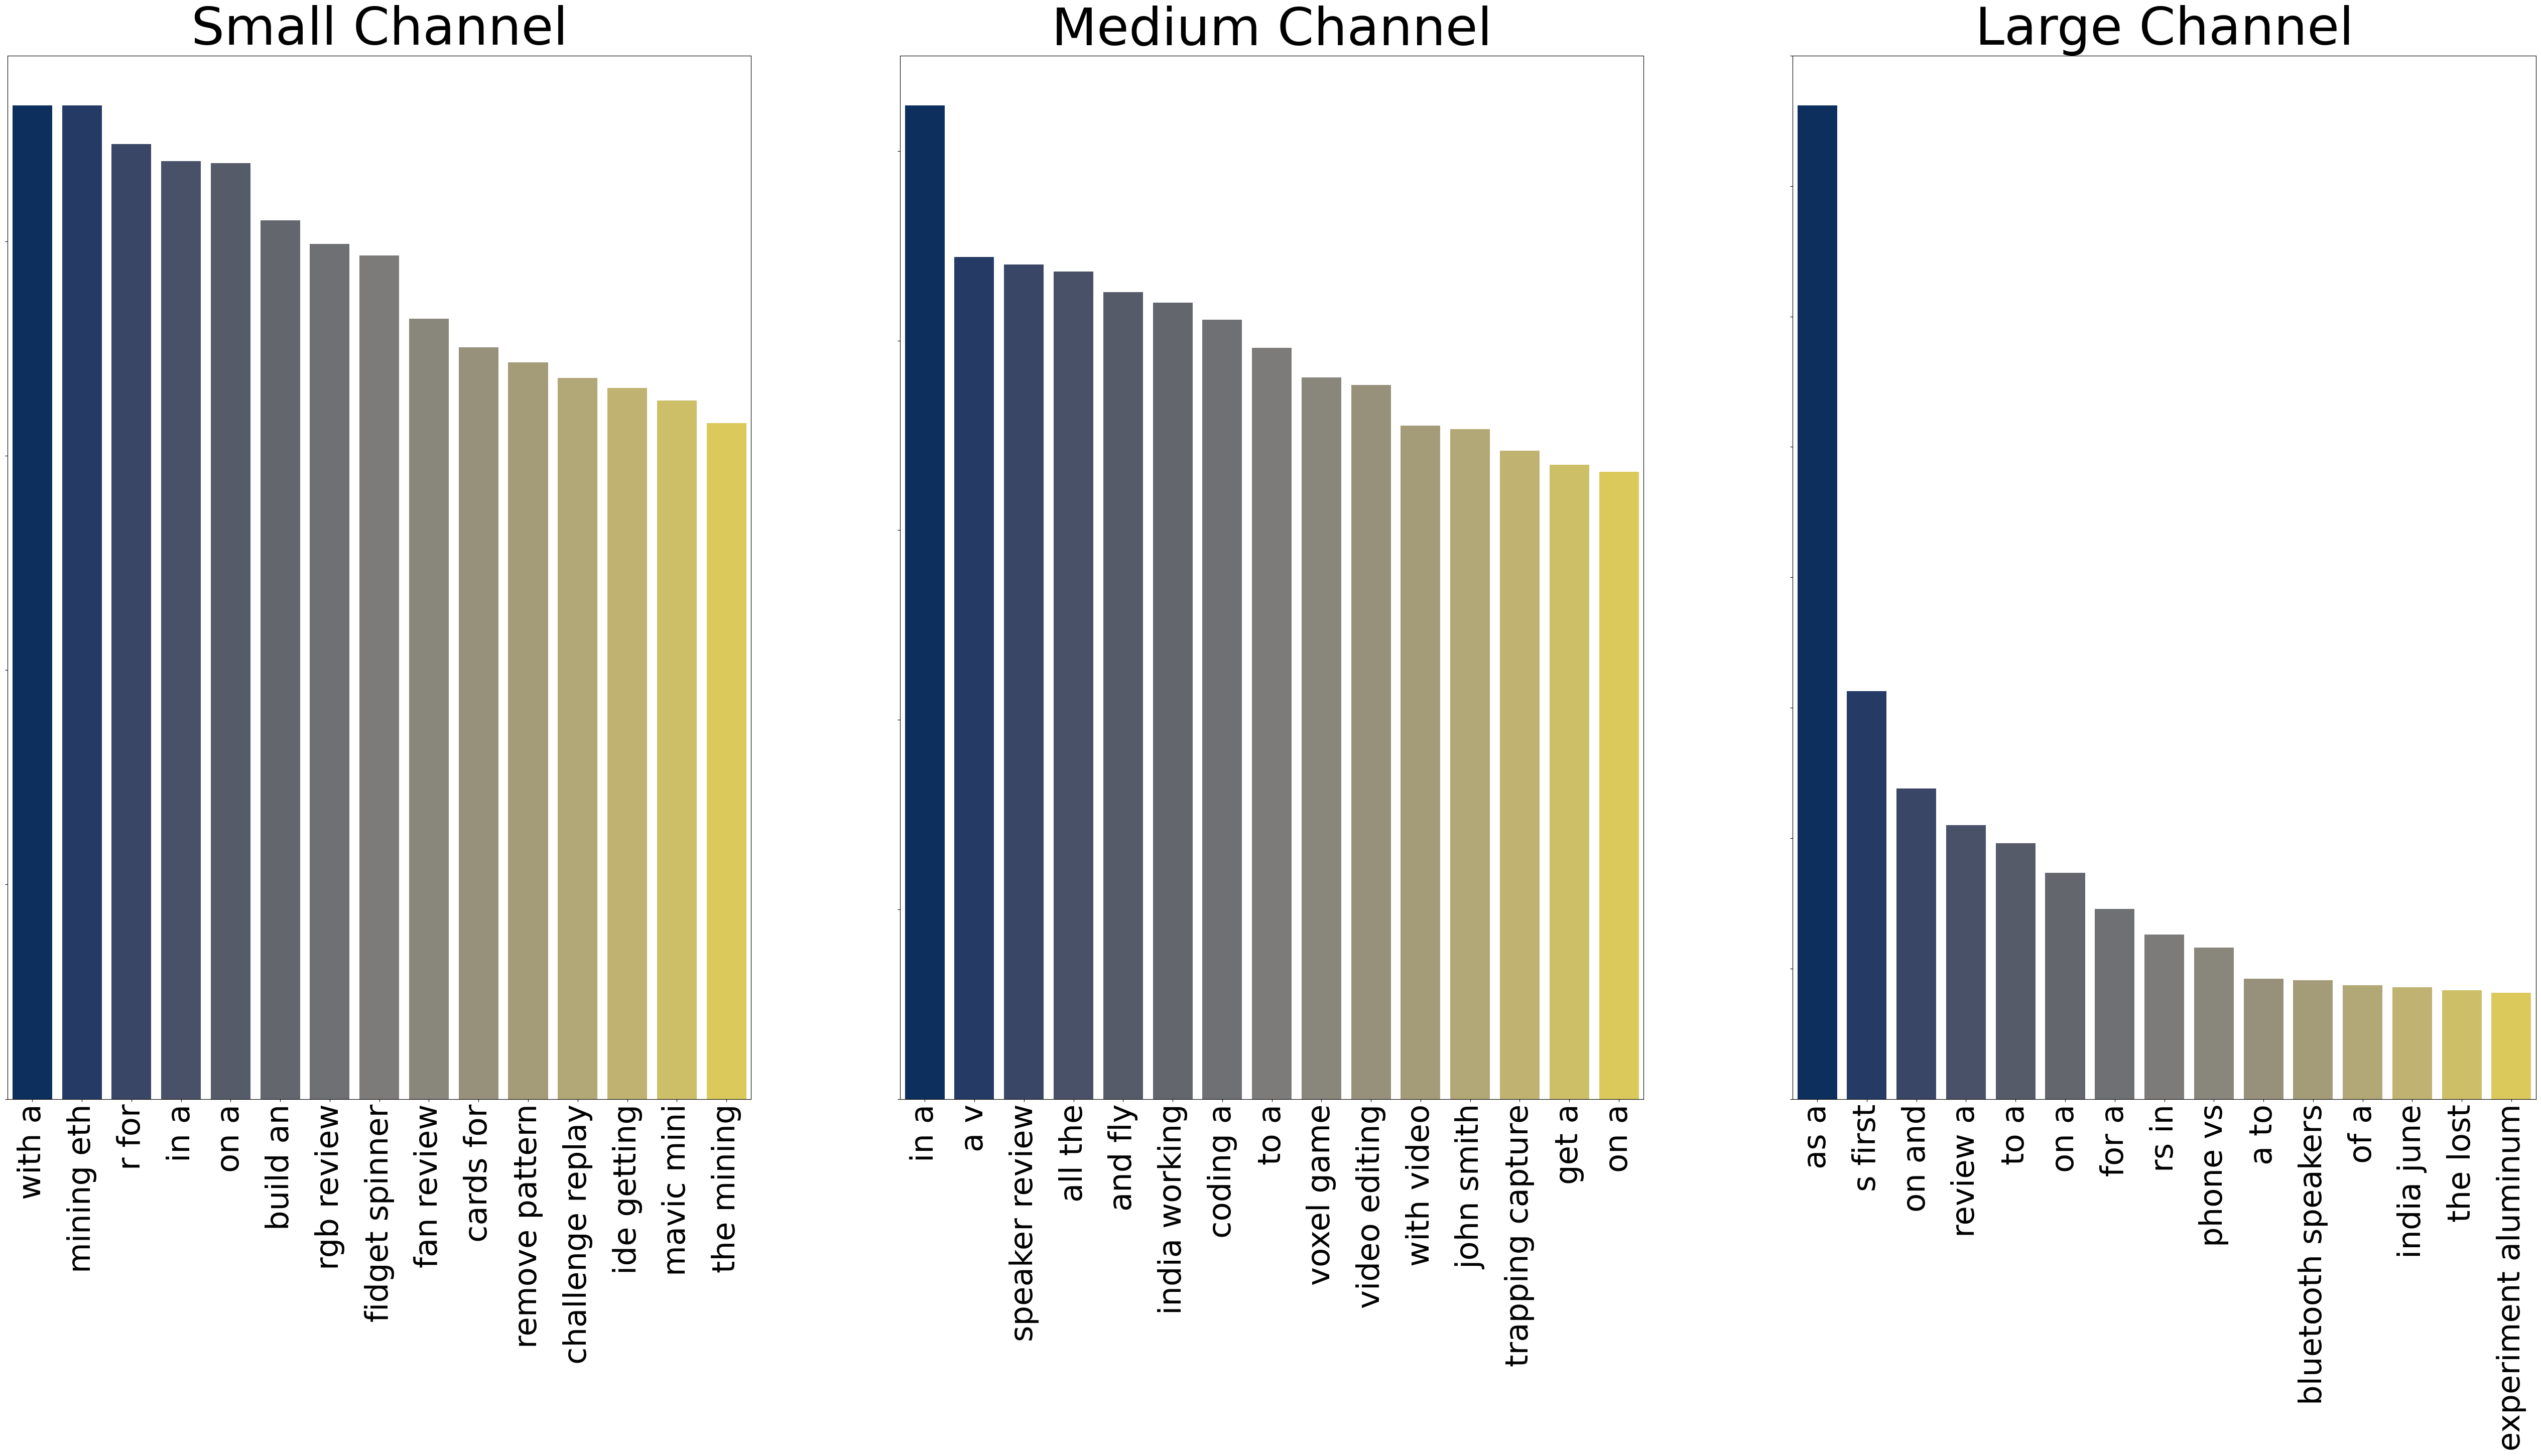

In [49]:
matplotlib.style.use('default')
# [10] https://stackoverflow.com/questions/48204780/how-to-plot-multiple-figures-in-a-row-using-seaborn

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(65,27))
sns.barplot(x=largest_15_keys_25, y=largest_15_values_25, palette='cividis', ax=ax1)
ax1.set_yticklabels(labels='')

ax1.set_xticklabels(rotation=90, labels=largest_15_keys_25, fontsize=45)
ax1.set_title("Small Channel", fontsize=75)

sns.barplot(x=largest_15_keys_50, y=largest_15_values_50, palette='cividis', ax=ax2)
ax2.set_xticklabels(rotation=90, labels=largest_15_keys_50, fontsize=45)
ax2.set_title("Medium Channel", fontsize=75)
ax2.set_yticklabels(labels='')

sns.barplot(x=largest_15_keys_75, y=largest_15_values_75, palette='cividis', ax=ax3)
ax3.set_xticklabels(rotation=90, labels=largest_15_keys_75, fontsize=45)
ax3.set_title("Large Channel", fontsize=75)
ax3.set_yticklabels(labels='')

plt.show()


In [50]:
# length of words in the title
df_25['Title Word Count'] = df_25['Title'].apply(lambda sent: len(sent.split(' ')))
df_50['Title Word Count'] = df_50['Title'].apply(lambda sent: len(sent.split(' ')))
df_75['Title Word Count'] = df_75['Title'].apply(lambda sent: len(sent.split(' ')))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [51]:
df_25['Title Word Count'].describe()

count    1872.00000
mean        7.44765
std         3.00266
min         1.00000
25%         5.00000
50%         7.00000
75%         9.00000
max        18.00000
Name: Title Word Count, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


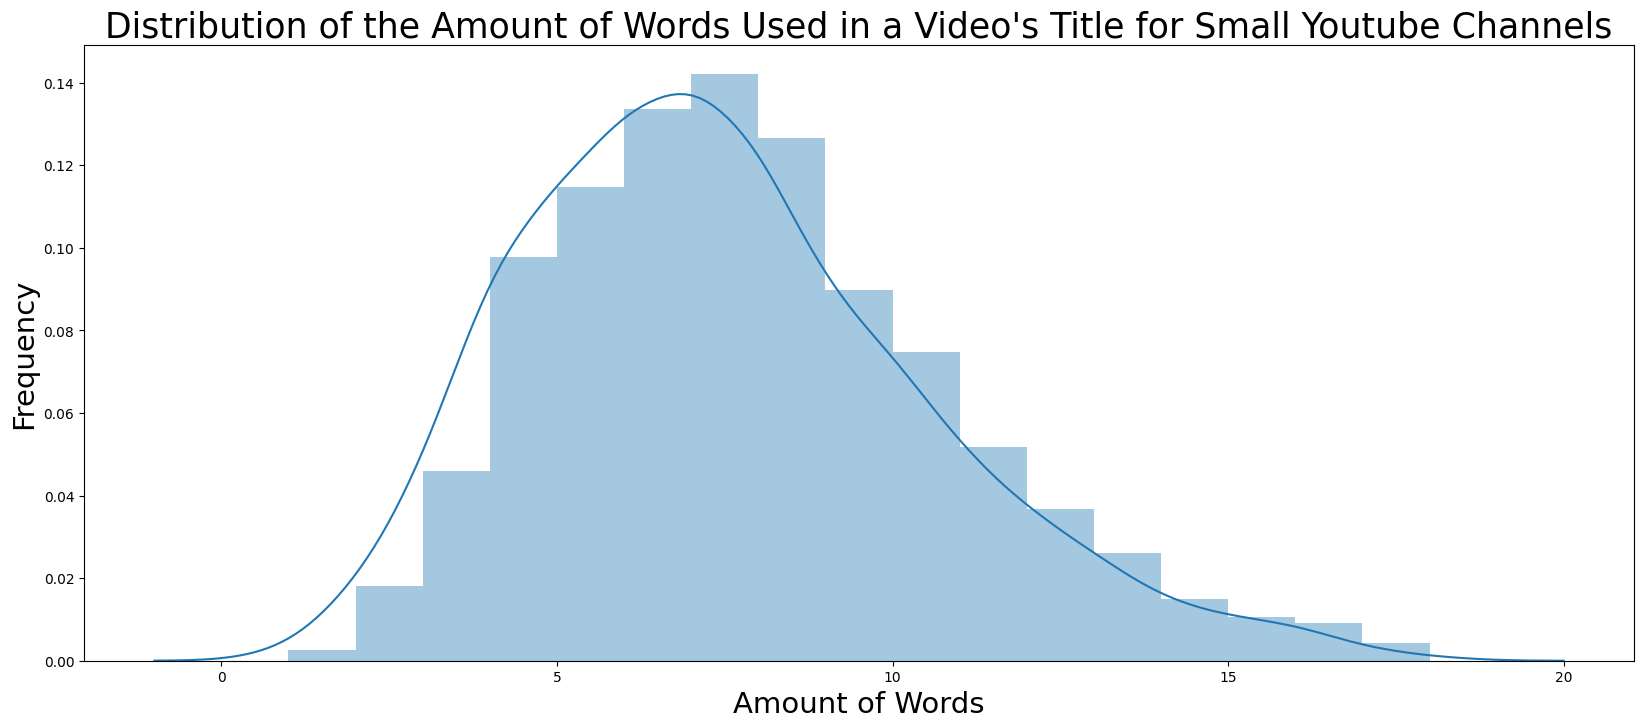

In [52]:
plt.figure(figsize=(20, 8))
sns.distplot(df_25['Title Word Count'], bins=17)
plt.xlabel('Amount of Words', fontSize=21)
plt.ylabel('Frequency', fontSize=21)
plt.title("Distribution of the Amount of Words Used in a Video's Title for Small Youtube Channels", fontSize=25)
plt.show()

In [53]:
df_50['Title Word Count'].describe()

count    1918.000000
mean        7.729406
std         2.901492
min         1.000000
25%         6.000000
50%         7.000000
75%        10.000000
max        19.000000
Name: Title Word Count, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


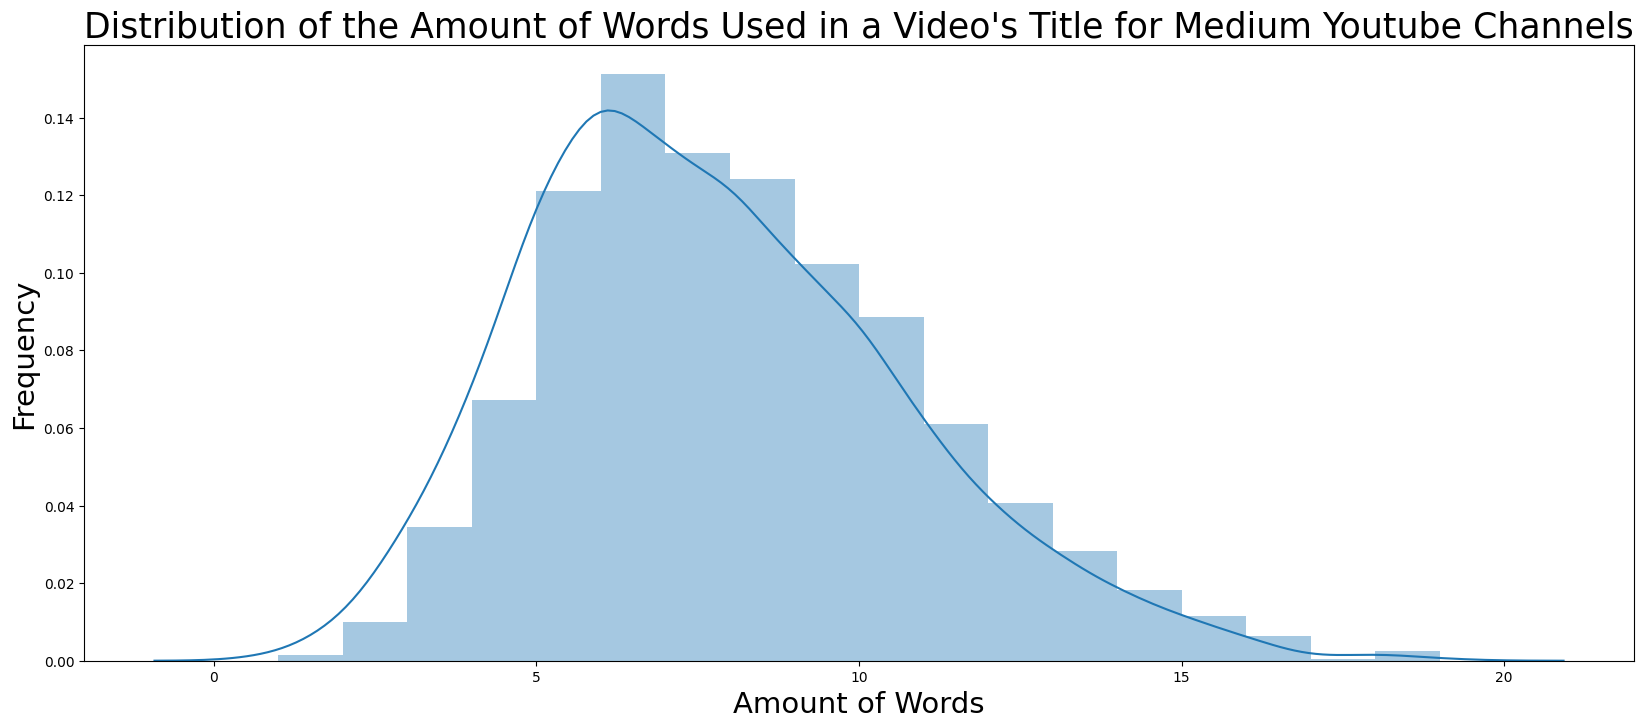

In [54]:
plt.figure(figsize=(20, 8))
sns.distplot(df_50['Title Word Count'], bins=18)
plt.xlabel('Amount of Words', fontSize=21)
plt.ylabel('Frequency', fontSize=21)
plt.title("Distribution of the Amount of Words Used in a Video's Title for Medium Youtube Channels", fontSize=25)
plt.show()

In [55]:
df_75['Title Word Count'].describe()

count    1896.000000
mean        8.072785
std         3.219167
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        19.000000
Name: Title Word Count, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


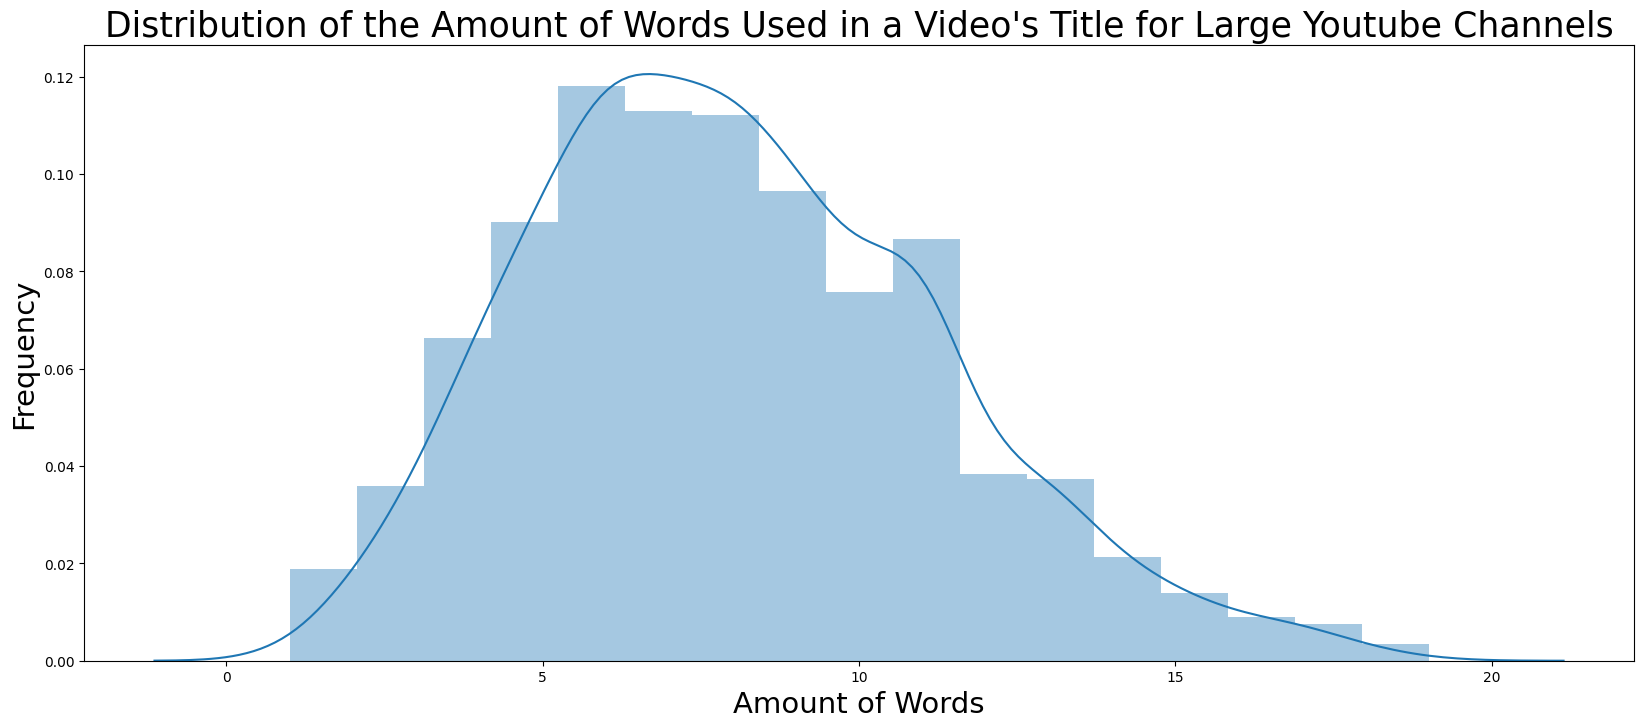

In [56]:
plt.figure(figsize=(20, 8))
sns.distplot(df_75['Title Word Count'], bins=17)
plt.xlabel('Amount of Words', fontSize=21)
plt.ylabel('Frequency', fontSize=21)
plt.title("Distribution of the Amount of Words Used in a Video's Title for Large Youtube Channels", fontSize=25)
plt.show()

In [57]:
# Seeing which title length recieves the largest amount of views
titleSet_25 = set(df_25['Title Word Count'])
wordViews_25 = {}

for x in titleSet_25:
    viewAvg = df_25[df_25['Title Word Count'] == x]['Views'].sum() / len(df_25[df_25['Title Word Count'] == x]['Views'])
    wordViews_25[x] = viewAvg

print(wordViews_25)

{1: 1268.2, 2: 8511.676470588236, 3: 9283.0, 4: 9772.31693989071, 5: 8820.45581395349, 6: 8836.852, 7: 12125.560150375939, 8: 13117.32911392405, 9: 12949.279761904761, 10: 9227.05, 11: 9012.577319587628, 12: 10446.202898550724, 13: 10813.591836734693, 14: 9017.535714285714, 15: 15323.75, 16: 7986.470588235294, 17: 8995.666666666666, 18: 430.5}


In [58]:
titleSet_50 = set(df_50['Title Word Count'])
wordViews_50 = {}

for x in titleSet_50:
    viewAvg = df_50[df_50['Title Word Count'] == x]['Views'].sum() / len(df_50[df_50['Title Word Count'] == x]['Views'])
    wordViews_50[x] = viewAvg

print(wordViews_50)

{1: 2583.0, 2: 11029.368421052632, 3: 11314.712121212122, 4: 10967.201550387597, 5: 9972.754310344828, 6: 10522.941379310345, 7: 12480.18326693227, 8: 14418.882352941177, 9: 12183.882653061224, 10: 12453.911764705883, 11: 13920.888888888889, 12: 14144.21794871795, 13: 19827.40740740741, 14: 11360.228571428572, 15: 6547.363636363636, 16: 22300.666666666668, 17: 1034.0, 18: 6878.5, 19: 1374.0}


In [59]:
titleSet_75 = set(df_75['Title Word Count'])
wordViews_75 = {}

for x in titleSet_75:
    viewAvg = df_75[df_75['Title Word Count'] == x]['Views'].sum() / len(df_75[df_75['Title Word Count'] == x]['Views'])
    print(df_75[df_75['Title Word Count'] == x]['Views'].sum(), len(df_75[df_75['Title Word Count'] == x]['Views']))
    wordViews_75[x] = viewAvg

print(wordViews_75)

67898 5
956278 33
1838233 72
3741020 133
4352485 181
6066691 237
5537140 227
5956309 225
4503254 194
3752938 152
4192272 174
1591541 77
1419346 75
749797 43
387576 28
383820 18
75937 15
165467 6
2220 1
{1: 13579.6, 2: 28978.121212121212, 3: 25531.01388888889, 4: 28127.96992481203, 5: 24046.878453038673, 6: 25597.852320675105, 7: 24392.687224669604, 8: 26472.484444444446, 9: 23212.649484536083, 10: 24690.38157894737, 11: 24093.51724137931, 12: 20669.363636363636, 13: 18924.613333333335, 14: 17437.13953488372, 15: 13842.0, 16: 21323.333333333332, 17: 5062.466666666666, 18: 27577.833333333332, 19: 2220.0}


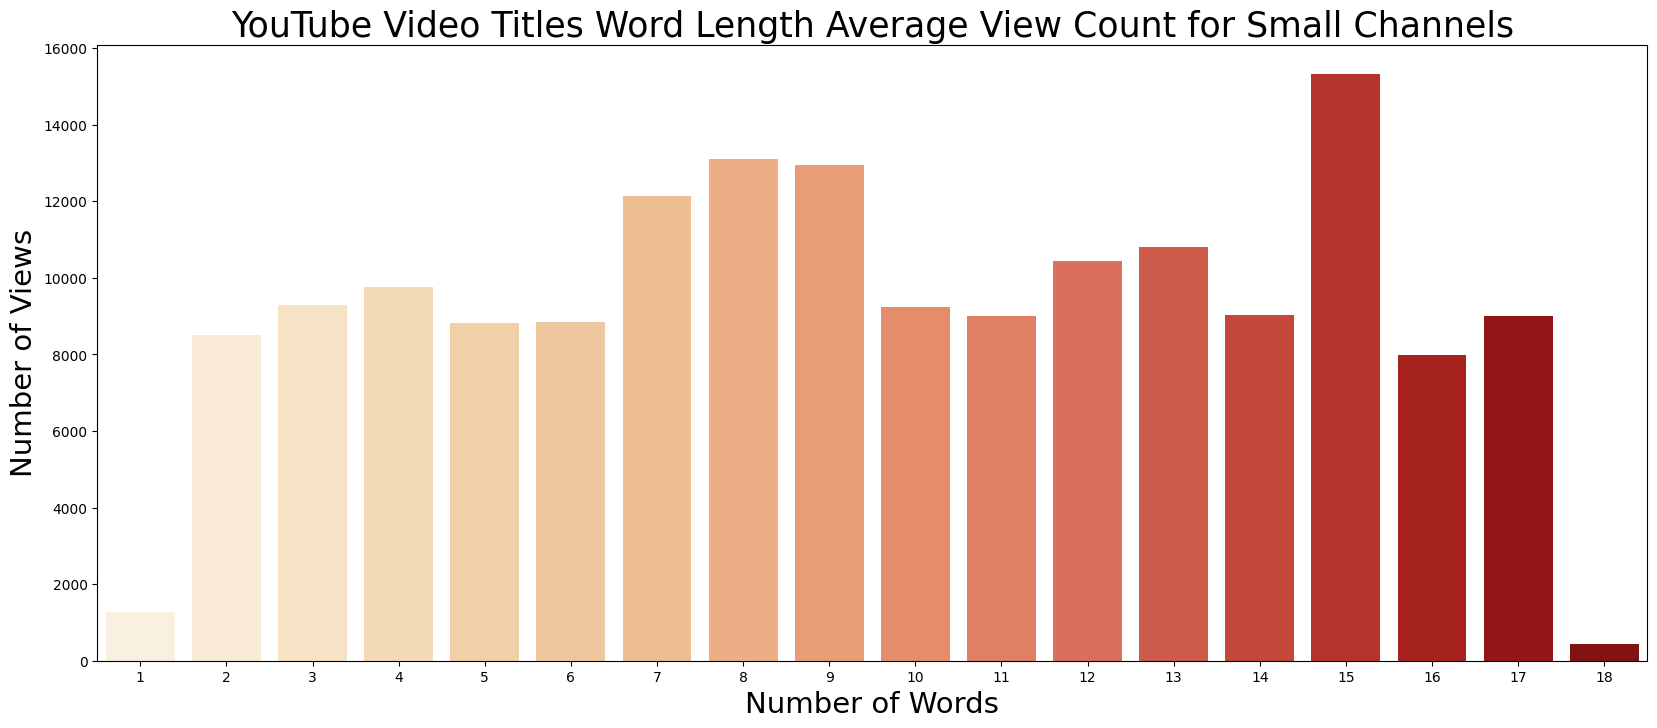

In [60]:
plt.figure(figsize=(20, 8))
sns.barplot(x=list(wordViews_25.keys()), y=list(wordViews_25.values()), palette='OrRd')
plt.xlabel('Number of Words', fontSize=21)
plt.ylabel('Number of Views', fontSize=21)
plt.title("YouTube Video Titles Word Length Average View Count for Small Channels", fontSize=25)
plt.show()

In [61]:
title_count_15 = df_25[df_25['Title Word Count'] == 15]
for _, rows in title_count_15.iterrows():
    print(rows['Title'])

no more diss tracks official music video ricegum jake paul sidemen ksi deji compliment track
how to turn game bios into mining bios to recognize all your gpus indepth series
xiaomi linux android in one duo os bit any pc install on acer tab concept
ubex trading desk tutorial part how to top up you balance and launch a campaign
david schwartz on xrp ledger plus madigan on liquidity voisine on brd wallet ripple drop
swell recap talking ripplenet the blockchain in payments report and xrp and odl ripple drop
typeit readit mac tutorial free text to speech software tts daniel voice and speech recognition
mt washington auto road in an electric vehicle is a beautiful joyful and thrilling experience
ev club of ct barry kresch discusses cheapr rebates westport police model jay leno interview
using vami update to vmware vcenter server resolves issue high cpu usage in vcsa vm
how to install configure a vm backup using nakivo appliance in a vmware vsphere environment
vmware esxi update to using esxc

In [62]:
title_count_15 = df_25[df_25['Title Word Count'] == 7]
for _, rows in title_count_15.iterrows():
    print(rows['Title'])

unboxing the lexus of wireless routers asus
these big rocks are secretly bluetooth speakers
goolrc unboxing review the smallest foldable drone
logitech does it really taste like jellybeans
this lightbulb is also a bluetooth speaker
weird products that will totally underwhelm you
a bluetooth speaker should you buy it
a premium usb fan with touch controls
pixter lenses make your phone camera amazing
more fidget spinners and their special powers
spoons suck get a self stirring mug
control your computer with this toy car
unboxing review of the ogon smart wallet
how to secure your bitcoins with cryptotag
low power vega with amd memory tweaker
pewdiepie is supporting crypto livestream platform quickvlog
top people who took mining too far
cudo miner review it my favourite now
initial coin offerings free ico research tools
contactless bank card scam gtx at gamescom
gtx giveaway announcement ʟᴇᴛ ᴛʜᴇ ɢᴀᴍᴇs ʙᴇɢɪɴ
fpga asic miner alternative gpu mining giveaway
how to mine ravencoin rvn on gpu
how

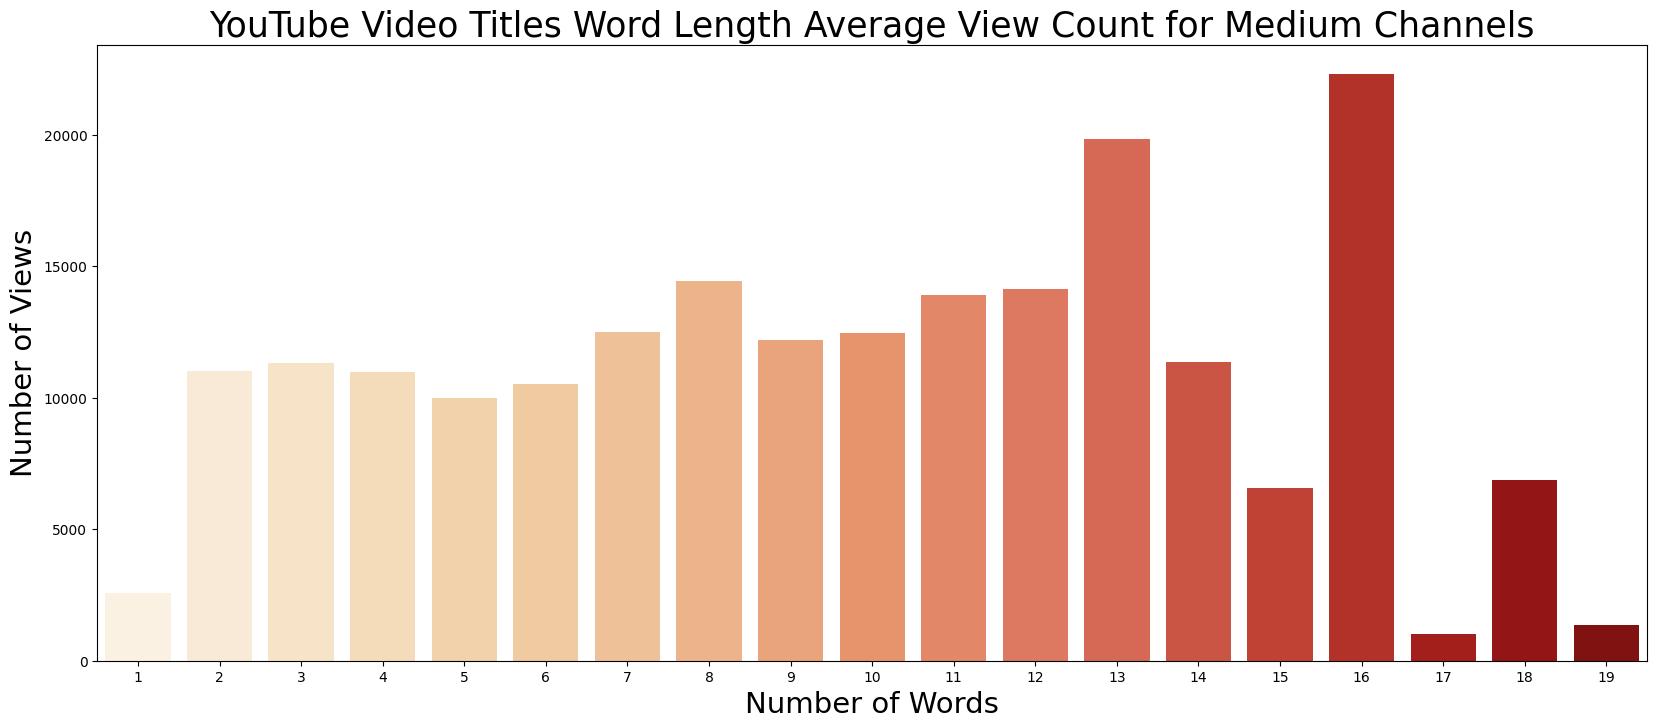

In [63]:
plt.figure(figsize=(20, 8))
sns.barplot(x=list(wordViews_50.keys()), y=list(wordViews_50.values()), palette='OrRd')
plt.xlabel('Number of Words', fontSize=21)
plt.ylabel('Number of Views', fontSize=21)
plt.title("YouTube Video Titles Word Length Average View Count for Medium Channels", fontSize=25)
plt.show()

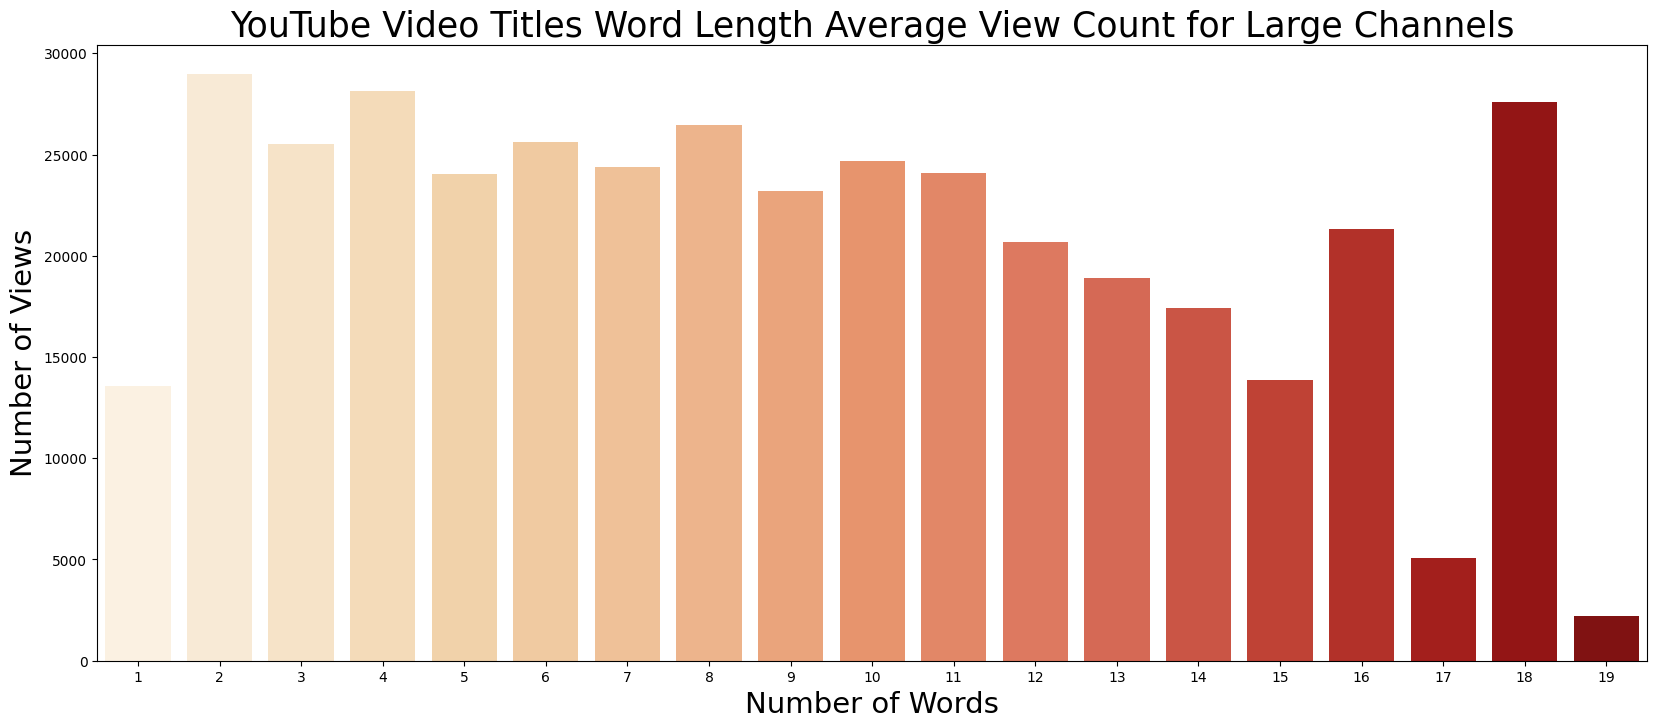

In [64]:
plt.figure(figsize=(20, 8))
sns.barplot(x=list(wordViews_75.keys()), y=list(wordViews_75.values()), palette='OrRd')
plt.xlabel('Number of Words', fontSize=21)
plt.ylabel('Number of Views', fontSize=21)
plt.title("YouTube Video Titles Word Length Average View Count for Large Channels", fontSize=25)
plt.show()

In [65]:
# Reading level Flech Kincaid

df_25['FK Reading Level'] = df_25['Title'].apply(lambda sent: textstat.flesch_kincaid_grade(sent))
df_25['FK Reading Level'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count    1872.000000
mean        6.218697
std         4.202303
min        -3.500000
25%         3.300000
50%         6.000000
75%         8.800000
max        32.800000
Name: FK Reading Level, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


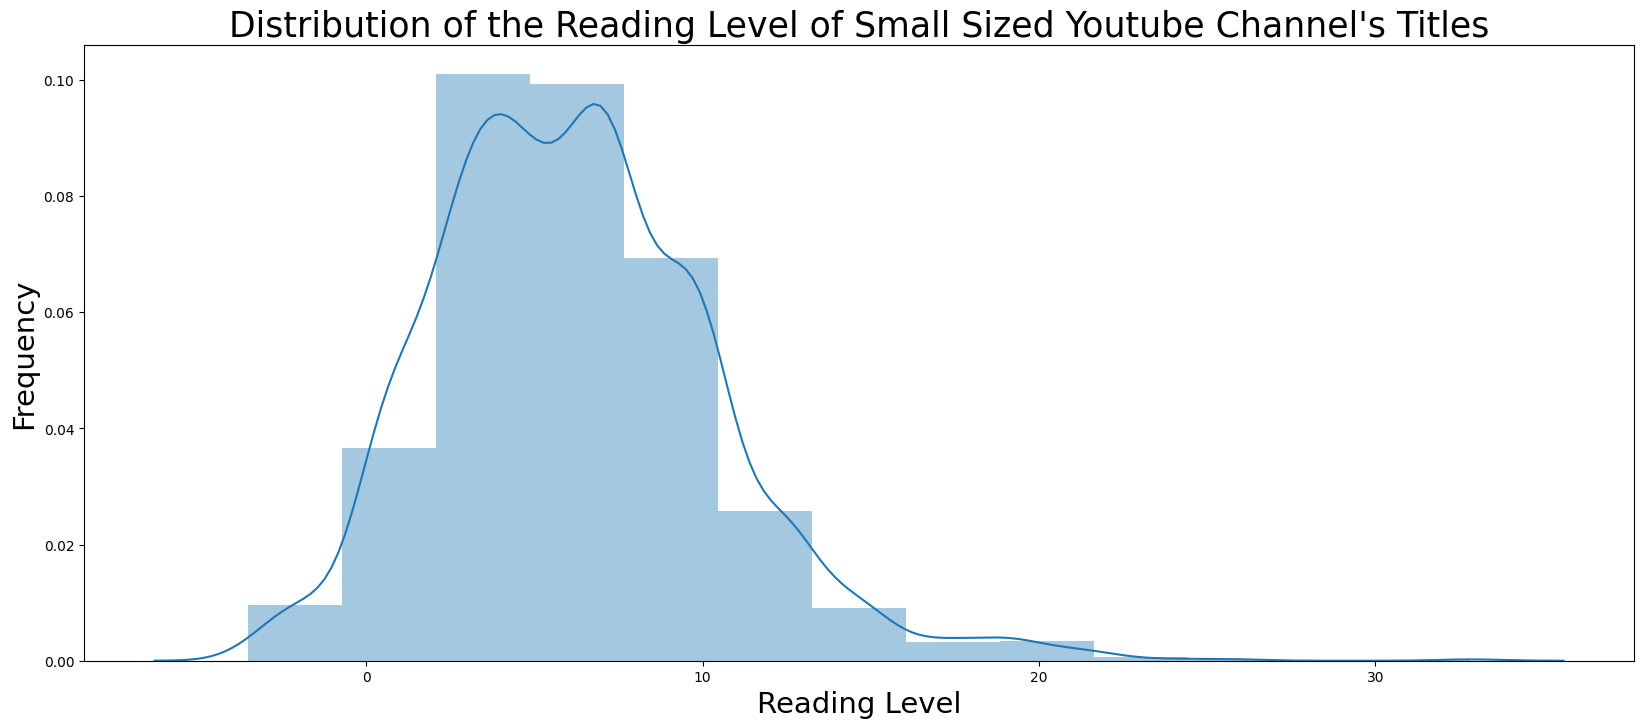

In [66]:
plt.figure(figsize=(20, 8))
sns.distplot(df_25['FK Reading Level'], bins=13)
plt.xlabel('Reading Level', fontSize=21)
plt.ylabel('Frequency', fontSize=21)
plt.title("Distribution of the Reading Level of Small Sized Youtube Channel's Titles", fontSize=25)
plt.show()

In [67]:
df_50['FK Reading Level'] = df_50['Title'].apply(lambda sent: textstat.flesch_kincaid_grade(sent))
df_50['FK Reading Level'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    1918.000000
mean        6.082586
std         4.149573
min       -15.700000
25%         3.300000
50%         6.000000
75%         8.400000
max        43.800000
Name: FK Reading Level, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


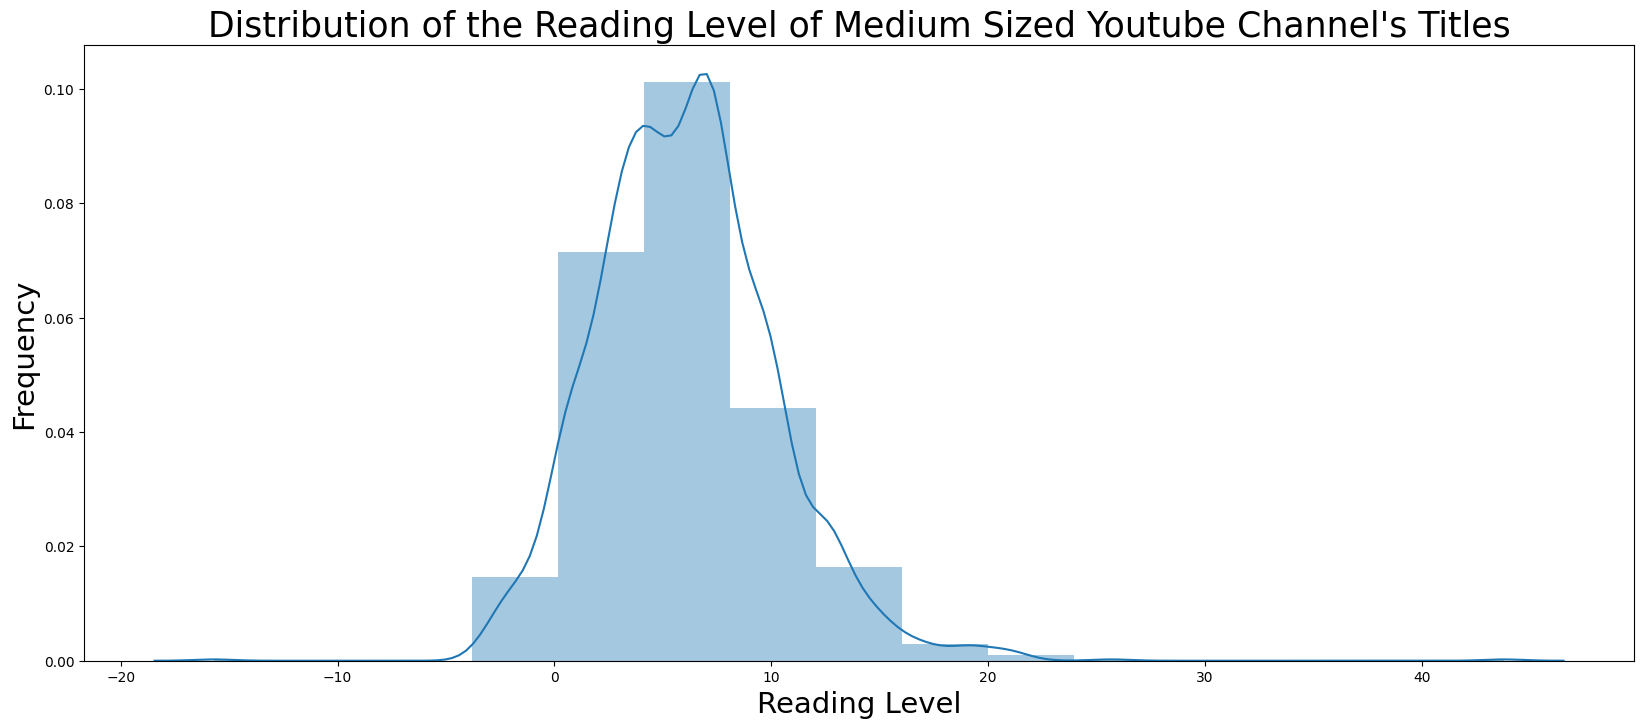

In [68]:
plt.figure(figsize=(20, 8))
sns.distplot(df_50['FK Reading Level'], bins=15)
plt.xlabel('Reading Level', fontSize=21)
plt.ylabel('Frequency', fontSize=21)
plt.title("Distribution of the Reading Level of Medium Sized Youtube Channel's Titles", fontSize=25)
plt.show()

In [69]:
df_75['FK Reading Level'] = df_75['Title'].apply(lambda sent: textstat.flesch_kincaid_grade(sent))
df_75['FK Reading Level'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    1896.000000
mean        5.983914
std         4.040285
min       -15.700000
25%         3.300000
50%         6.000000
75%         8.000000
max        30.800000
Name: FK Reading Level, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


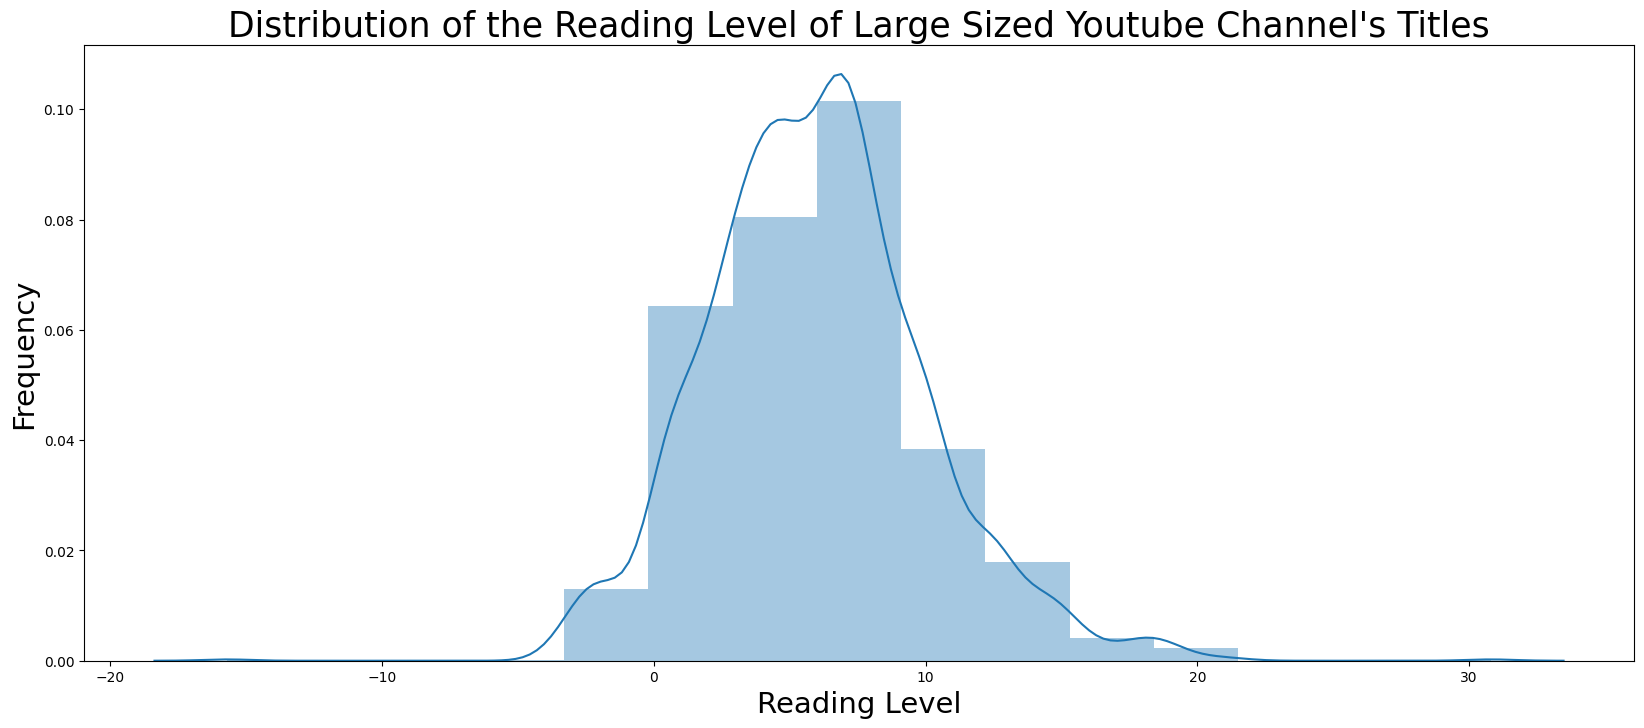

In [70]:
plt.figure(figsize=(20, 8))
sns.distplot(df_75['FK Reading Level'], bins=15)
plt.xlabel('Reading Level', fontSize=21)
plt.ylabel('Frequency', fontSize=21)
plt.title("Distribution of the Reading Level of Large Sized Youtube Channel's Titles", fontSize=25)
plt.show()

In [71]:
df_25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 116 to 5566
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1872 non-null   int64  
 1   Channel           1872 non-null   object 
 2   Subs              1872 non-null   int64  
 3   Title             1872 non-null   object 
 4   Views             1872 non-null   int64  
 5   Link              1872 non-null   object 
 6   Likes             1872 non-null   object 
 7   Dislikes          1872 non-null   object 
 8   Description       1832 non-null   object 
 9   english           1872 non-null   bool   
 10  Title Word Count  1872 non-null   int64  
 11  FK Reading Level  1872 non-null   float64
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 177.3+ KB


In [72]:
df_25['Channel Size'] = "Small"
df_50['Channel Size'] = "Medium"
df_75['Channel Size'] = "Large"
df_all = pd.concat([df_25,df_50,df_75])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

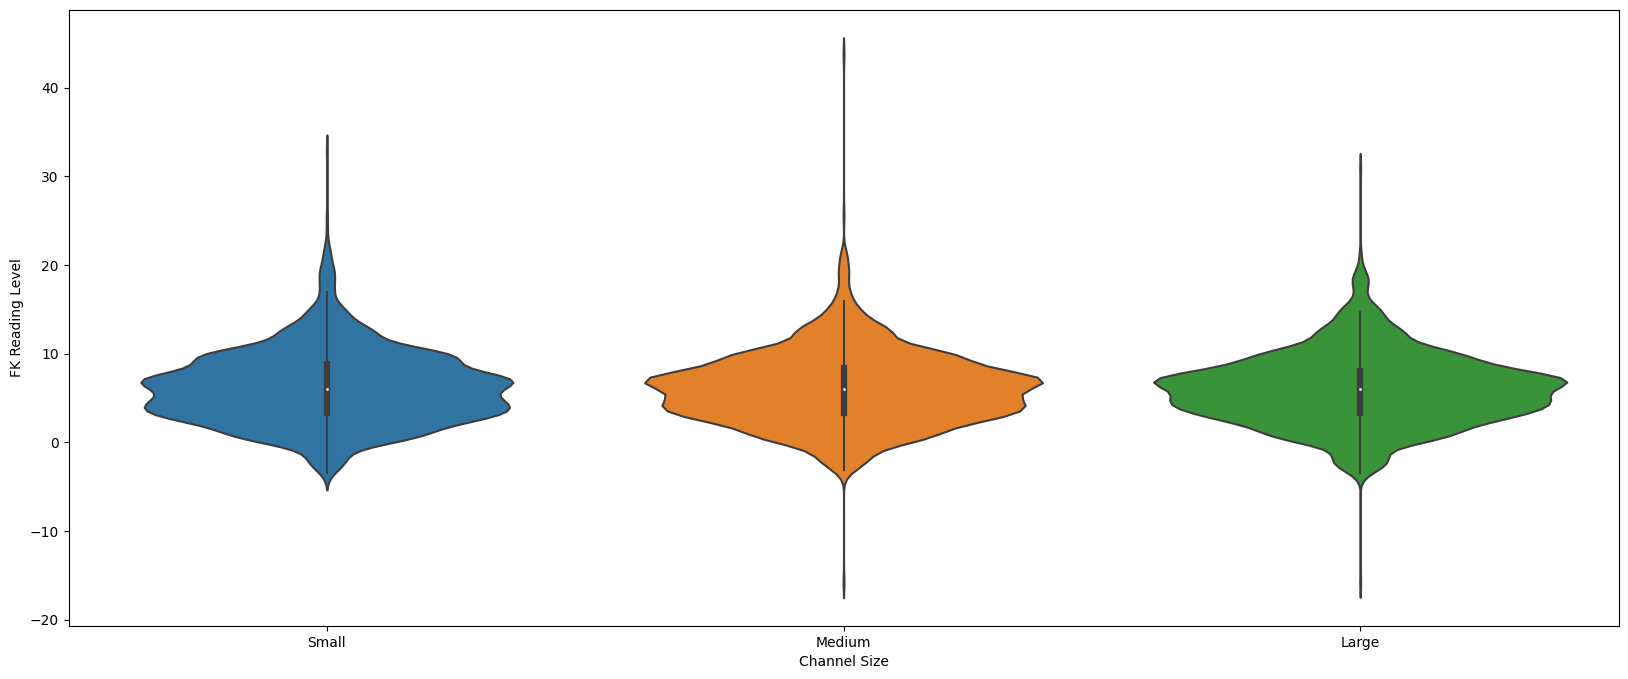

In [73]:
# [11] https://seaborn.pydata.org/examples/grouped_violinplots.html

plt.figure(figsize=(20, 8))
sns.violinplot(data=df_all, x='Channel Size', y='FK Reading Level')
plt.show()

In [74]:
df_all['FK Reading Level'].describe()

count    5686.000000
mean        6.094495
std         4.131427
min       -15.700000
25%         3.300000
50%         6.000000
75%         8.400000
max        43.800000
Name: FK Reading Level, dtype: float64

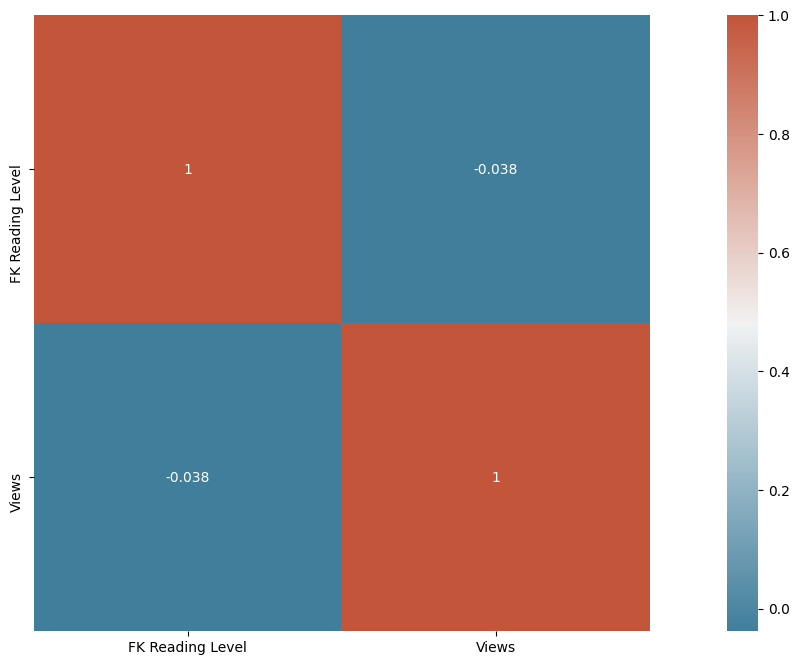

In [75]:
# [12] https://seaborn.pydata.org/examples/many_pairwise_correlations.html

plt.figure(figsize=(20, 8))
df_corr = df_all[['FK Reading Level',  'Views']]
corr = df_corr.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.title("")
sns.heatmap(corr, cmap=cmap, square=True, annot=True)

In [76]:
df_all.columns

Index(['Unnamed: 0', 'Channel', 'Subs', 'Title', 'Views', 'Link', 'Likes',
       'Dislikes', 'Description', 'english', 'Title Word Count',
       'FK Reading Level', 'Channel Size'],
      dtype='object')

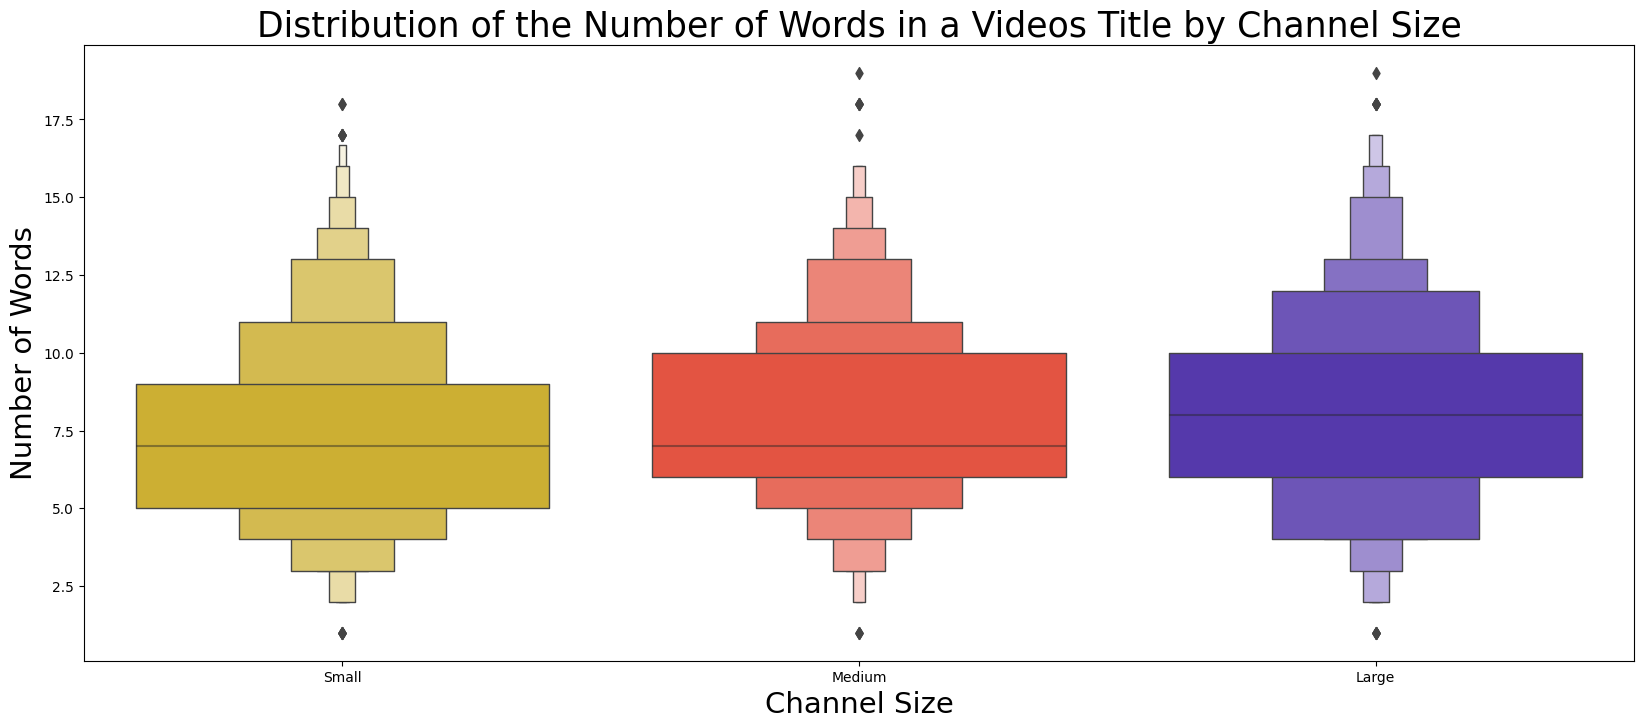

In [77]:
plt.figure(figsize=(20, 8))
sns.boxenplot(data=df_all, x='Channel Size', y='Title Word Count', palette='CMRmap_r')

plt.xlabel('Channel Size', fontSize=21)
plt.ylabel('Number of Words', fontSize=21)
plt.title("Distribution of the Number of Words in a Videos Title by Channel Size", fontSize=25)
plt.show()